# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [13]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anukritisharma/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
load_dotenv('APIKeys.env')

True

In [28]:
# Read your api key environment variable
api_key = os.getenv("NewsAPI")

In [29]:
from newsapi import NewsApiClient

In [30]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [32]:
#newsapi.get_everything(q="Bitcoin", language="en")


In [35]:
# Fetch the Bitcoin news articles
Btc_headlines = newsapi.get_everything(q="Bitcoin",language="en")
# Print total articles
print(f"Total articles about Bitcoin: {Btc_headlines['totalResults']}")

# Show sample article
Btc_headlines["articles"][0]

Total articles about Bitcoin: 8084


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Adi Robertson',
 'title': 'India will reportedly introduce bill to make owning cryptocurrency illegal',
 'description': 'India’s legislature is reportedly considering a near-total ban on private cryptocurrencies like Bitcoin or Ethereum, including owning the virtual currency. The government has discussed plans for a national digital currency as an alternative.',
 'url': 'https://www.theverge.com/2021/3/15/22332677/india-cryptocurrency-trading-mining-possession-ban-law-report',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/IdgNJaOIQBsN8QbQcH2MDU6sAUA=/0x243:2040x1311/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/10432811/mdoying_180308_2373_0091still.jpg',
 'publishedAt': '2021-03-15T22:25:02Z',
 'content': 'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat…

In [37]:
# Fetch the Ethereum news articles
Eth_headlines = newsapi.get_everything(q="Ethereum",language="en")
# Print total articles
print(f"Total articles about Ethereum: {Eth_headlines['totalResults']}")

# Show sample article
Eth_headlines["articles"][0]

Total articles about Ethereum: 2059


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Justine Calma',
 'title': 'The climate controversy swirling around NFTs',
 'description': 'Most NFTs are bought and sold with Ethereum, a cryptocurrency that guzzles up energy and pumps out a lot of greenhouse gas emissions. Artists are fighting over whether there can be a more sustainable future for crypto art.',
 'url': 'https://www.theverge.com/2021/3/15/22328203/nft-cryptoart-ethereum-blockchain-climate-change',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/pYrvxU6TUFVYkAwb6h1U4BPYMj0=/0x431:6000x3572/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22366636/1230723200.jpg',
 'publishedAt': '2021-03-15T13:51:11Z',
 'content': 'Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars]'}

In [38]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Btc_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text
0,-0.5574,0.000,0.110,0.890,One of the strictest crackdowns worldwide\r\nP...
1,-0.5106,0.000,0.142,0.858,The hacker behind last years big Twitter hack\...
2,0.6369,0.113,0.000,0.887,Some things are best left a mystery at least a...
3,0.0000,0.000,0.000,0.000,
4,0.8316,0.246,0.000,0.754,TL;DR: Enter the The Complete Bitcoin (BTC) In...


In [40]:
# Create the Ethereum sentiment scores DataFrame

Ethereum_sentiments=[]

for article in Eth_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.0000,0.000,0.000,1.000,Famed auction house Christies just sold its fi...
1,-0.5574,0.000,0.110,0.890,One of the strictest crackdowns worldwide\r\nP...
2,-0.1531,0.000,0.062,0.938,Here's everything you need to know about non-f...
3,0.4767,0.084,0.000,0.916,OpenSea has been one of a handful of NFT marke...
4,-0.4588,0.066,0.145,0.789,NFTs are the latest cryptocurrency rage these ...


In [41]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.134244,0.054944,0.019278,0.870278
std,0.397916,0.078998,0.045114,0.231544
min,-0.557400,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.855750
50%,0.000000,0.000000,0.000000,0.921000
75%,0.415300,0.083500,0.000000,1.000000
max,0.831600,0.246000,0.142000,1.000000


In [42]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.00000,20.000000,20.00000
mean,0.140250,0.06345,0.030750,0.90585
std,0.378420,0.05900,0.046713,0.06833
min,-0.557400,0.00000,0.000000,0.75400
25%,-0.038275,0.00000,0.000000,0.88075
50%,0.160900,0.06950,0.000000,0.91950
75%,0.411525,0.08550,0.064500,0.93825
max,0.831600,0.24600,0.145000,1.00000


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [70]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [128]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
new=['reuters','ha']
# Expand the default stopwords list if necessary
stop_words = stopwords.words('english')
stop_words.extend(new)

In [129]:
#set(stopwords.words('english'))

In [130]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes Text"""
    sw= stop_words
    
    regex= re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    return tokens
    
    
    

In [131]:
# Create a new tokens column for Bitcoin
Bitcoin_df["tokens"] = Bitcoin_df.Text.apply(tokenizer)
Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,-0.5574,0.000,0.110,0.890,One of the strictest crackdowns worldwide\r\nP...,"[one, strictest, crackdown, worldwidephoto, mi..."
1,-0.5106,0.000,0.142,0.858,The hacker behind last years big Twitter hack\...,"[hacker, behind, last, year, big, twitter, hac..."
2,0.6369,0.113,0.000,0.887,Some things are best left a mystery at least a...,"[thing, best, left, mystery, least, far, coinb..."
3,0.0000,0.000,0.000,0.000,,[]
4,0.8316,0.246,0.000,0.754,TL;DR: Enter the The Complete Bitcoin (BTC) In...,"[tldr, enter, complete, bitcoin, btc, investme..."


In [132]:
# Create a new tokens column for Ethereum
Ethereum_df["tokens"] = Ethereum_df.Text.apply(tokenizer)
Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.0000,0.000,0.000,1.000,Famed auction house Christies just sold its fi...,"[famed, auction, house, christies, sold, first..."
1,-0.5574,0.000,0.110,0.890,One of the strictest crackdowns worldwide\r\nP...,"[one, strictest, crackdown, worldwidephoto, mi..."
2,-0.1531,0.000,0.062,0.938,Here's everything you need to know about non-f...,"[heres, everything, need, know, nonfungible, t..."
3,0.4767,0.084,0.000,0.916,OpenSea has been one of a handful of NFT marke...,"[opensea, one, handful, nft, marketplace, expl..."
4,-0.4588,0.066,0.145,0.789,NFTs are the latest cryptocurrency rage these ...,"[nfts, latest, cryptocurrency, rage, day, band..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [133]:
from collections import Counter
from nltk import ngrams

In [134]:
bitcoin_p = tokenizer(Bitcoin_df.Text.str.cat())

In [135]:
# Generate the Bitcoin N-grams where N=2
N=2
bigram_counts_B = Counter(ngrams(bitcoin_p, N))
#print(dict(bigram_counts_B))

In [136]:
ethereum_p= tokenizer(Ethereum_df.Text.str.cat())

In [137]:
# Generate the Ethereum N-grams where N=2
N= 2
bigram_counts_E = Counter(ngrams(ethereum_p, N))
#print(dict(bigram_counts_E))

In [138]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [139]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_common= token_count(bitcoin_p, 10)
bitcoin_common

[('bitcoin', 8),
 ('charsby', 6),
 ('photo', 5),
 ('cryptocurrency', 4),
 ('exchange', 4),
 ('stafffile', 4),
 ('virtual', 4),
 ('currency', 4),
 ('illustration', 4),
 ('taken', 4)]

In [140]:
# Use token_count to get the top 10 words for Ethereum
ethereum_common= token_count(ethereum_p,10)
ethereum_common

[('cryptocurrency', 7),
 ('bitcoin', 6),
 ('digital', 5),
 ('token', 5),
 ('week', 5),
 ('new', 5),
 ('nonfungible', 4),
 ('ethereum', 4),
 ('company', 4),
 ('charsby', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [141]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

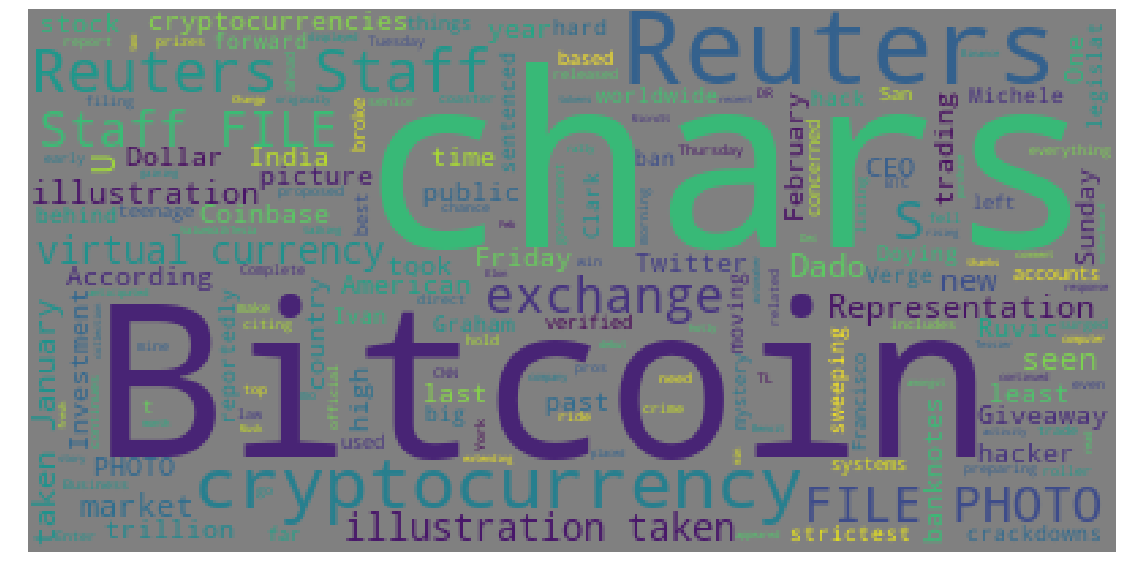

In [142]:
# Generate the Bitcoin word cloud
cloud1 = WordCloud(background_color='grey').generate(Bitcoin_df.Text.str.cat())
cloud1
plt.axis("off")
plt.imshow(cloud1)

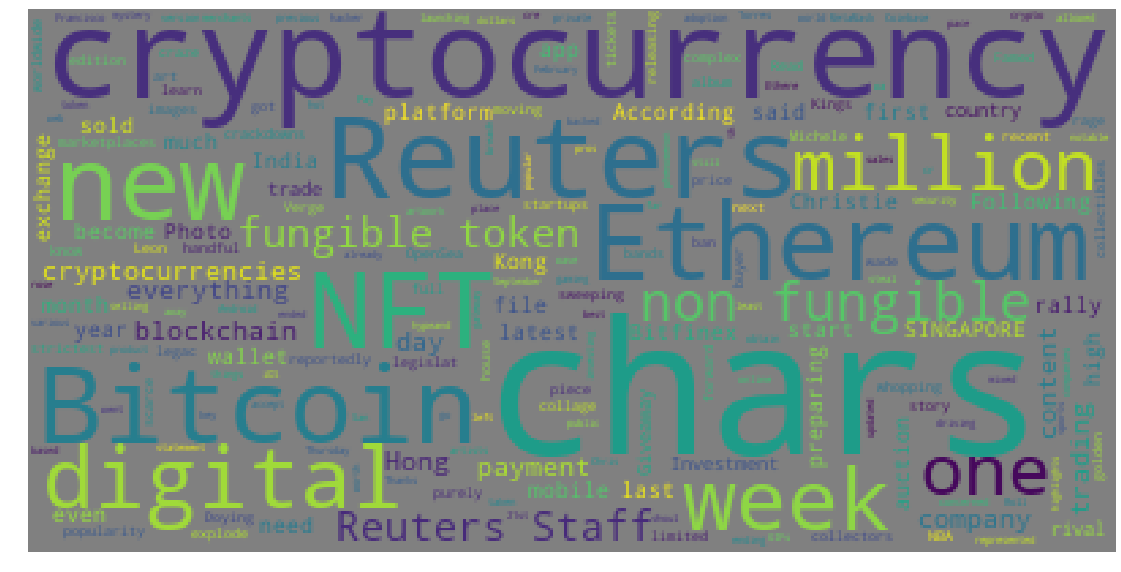

In [143]:
# Generate the Ethereum word cloud
cloud2 = WordCloud(background_color='grey').generate(Ethereum_df.Text.str.cat())
cloud2
plt.axis("off")
plt.imshow(cloud2)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [144]:
import spacy
from spacy import displacy

In [145]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [146]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [147]:
# Concatenate all of the Bitcoin text together
cnt_bitcoin = Bitcoin_df.Text.str.cat()

In [148]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(cnt_bitcoin)
bitcoin_doc
# Add a title to the document
bitcoin_doc.user_data["Title"] = "Bitcoin NER"




In [149]:
# Render the visualization
displacy.render(bitcoin_doc, style = 'ent')

In [150]:
# List all Entities
for i in bitcoin_doc.ents:
    print(i.text, i.label_)

One CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
last years DATE
Twitter PRODUCT
Graham Ivan Clark PERSON
Twitters NORP
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
over $12,000 MONEY
India GPE
Reuters ORG
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
Coinbase WORK_OF_ART
American NORP
19, 2021 DATE
Elon Musk PERSON
Binance GPE
Changp GPE
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin PERSON
January 21, 2021 DATE
Reuters ORG
Reuters ORG
Feb 21 DATE
Reuters ORG
Sunday DATE
two-month DATE
$1 trillion MONEY
Friday DATE
Reuters ORG
Pristina GPE
Kosovo GPE
June 12, 2018 DATE
HONG KONG GPE
Reuters Breakingviews ORG
week of February DATE
North American NORP
4 CARDINAL
Bitcoin PERSON
past $56,000 MONEY
Friday DATE
$1 trillion MONEY
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 8, 2021 DATE
Dado Ru PERSON
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 27, 2020 DATE
KTS Design/Science P

---

### Ethereum NER

In [151]:
# Concatenate all of the Ethereum text together
cnt_ethereum = Ethereum_df.Text.str.cat()


In [152]:
# Run the NER processor on all of the text
ethereum_doc = nlp(cnt_ethereum)
ethereum_doc
ethereum_doc.user_data["Title"] = "Ethereum NER"

In [153]:
# Render the visualization
displacy.render(ethereum_doc, style = 'ent')

In [154]:
# List all Entities
for i in ethereum_doc.ents:
    print(i.text, i.label_)

Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
here.)OpenSea GPE
NFT ORG
recent weeks DATE
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
Ethereum ORG
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
one CARDINAL
Ethereum ORG
September 2020 DATE
about $5.7 million MONEY
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex ORG
Bitfinex ORG
millions of dollars MONEY
Reuters ORG
SINGAPORE PERSON
Reuters ORG
Asian NORP
Saturday DATE
two-month DATE
$1 trillion MONEY
a day earlier DATE
Reuters ORG
Meitu ORG
Hong Kong GPE
China GPE
March 24, 2017 DATE
Bobby Yip PERSON
HONG KONG GPE
Reuters ORG
Hong Ko PERSON
more than a year ago DATE
Ethereum ORG
over $12,000 MONEY
India GPE
Reuters ORG
Reuters ORG
BUCHAREST PERSON
Reuters ORG
t

---